## Utför linjär regression på alla fyra mätserier

1.2145025260401243
0.0009099549952658252
0.9701499497351406


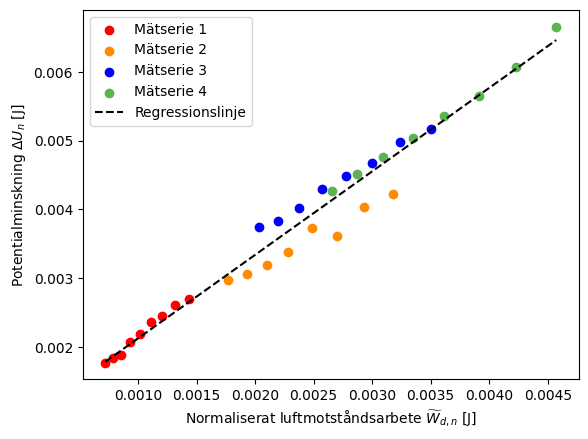

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress

def get_filepath(i, j):
    return f'./../../data_analysis/del1/regression_data_kula{i}_mätning_{j}.csv'

# Read CSV files into DataFrames
dfs = []
for ball in range(1, 3):
    for measurement in range(1, 3):
        filepath = get_filepath(ball, measurement)
        df = pd.read_csv(filepath, sep=',', comment='#', header=0)
        dfs.append(df)

df_tot = pd.concat(dfs, ignore_index=True)
df_tot = df_tot.sort_values(by='x (J)')

fig, ax = plt.subplots()
ax.set_xlabel(r'Normaliserat luftmotståndsarbete $\widetilde{W}_{d, n}$ [J]')
ax.set_ylabel(r'Potentialminskning $\Delta U_n$ [J]')

ax.scatter(dfs[0]['x (J)'], dfs[0]['y (J)'], color='red', label='Mätserie 1')
ax.scatter(dfs[1]['x (J)'], dfs[1]['y (J)'], color='darkorange', label='Mätserie 2')
ax.scatter(dfs[2]['x (J)'], dfs[2]['y (J)'], color='blue', label='Mätserie 3')
ax.scatter(dfs[3]['x (J)'], dfs[3]['y (J)'], color='#5bb450', label='Mätserie 4')

slope, intercept, r, p, std_err = linregress(df_tot['x (J)'], df_tot['y (J)'])

x_plot = np.linspace(df_tot['x (J)'].min(), df_tot['x (J)'].max())
ax.plot(x_plot, slope * x_plot + intercept, 'k--', label='Regressionslinje')
ax.legend()

print(slope)
print(intercept)
print(r ** 2)